In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

# -------------------------------
# 🔧 تثبيت البذور لضمان إعادة إنتاج النتائج
# -------------------------------
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# -------------------------------
# 1️⃣ توليد بيانات وهمية
# -------------------------------

# توليد 10,000 عينة، كل منها تمثل قراءات استشعار (سرعة زاوية، عزم، تيار)
n_samples = 10000

# البيانات الطبيعية (بدون اضطراب)
normal_data = np.random.normal(loc=0, scale=0.5, size=(n_samples//2, 3))

# البيانات التي تمثل اهتزاز أو اضطراب (trumbling)
fault_data = np.random.normal(loc=0, scale=2.0, size=(n_samples//2, 3))

# دمج البيانات
X = np.vstack((normal_data, fault_data))
y = np.hstack((np.zeros(n_samples//2), np.ones(n_samples//2)))  # 0=عادي، 1=اضطراب

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ تم تقسيم البيانات:")
print(f"   - عدد عينات التدريب: {len(X_train)}")
print(f"   - عدد عينات الاختبار: {len(X_test)}")

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# -------------------------------
# 2️⃣ Build neural network model
# -------------------------------

model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(3,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("✅ Model built:")
model.summary()

NameError: name 'keras' is not defined

In [ ]:
# -------------------------------
# 3️⃣ Train the model with Callbacks
# -------------------------------

# Create callbacks for improvement
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        'best_detector_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

history = model.fit(
    X_train, y_train,
    epochs=50,  # can be increased with EarlyStopping
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

print("\n✅ Training completed!")

Epoch 1/20


I0000 00:00:1762247036.015931     103 service.cc:148] XLA service 0x7e0f8400ae00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762247036.016679     103 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762247036.016700     103 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1762247036.257449     103 cuda_dnn.cc:529] Loaded cuDNN version 90300


 77/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4639 - loss: 0.7597

I0000 00:00:1762247036.990133     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4938 - loss: 0.7002 - val_accuracy: 0.7362 - val_loss: 0.5128
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8129 - loss: 0.4674 - val_accuracy: 0.9156 - val_loss: 0.3637
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9322 - loss: 0.3294 - val_accuracy: 0.9312 - val_loss: 0.2449
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9319 - loss: 0.2286 - val_accuracy: 0.9331 - val_loss: 0.1895
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9407 - loss: 0.1822 - val_accuracy: 0.9331 - val_loss: 0.1805
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9348 - loss: 0.1844 - val_accuracy: 0.9350 - val_loss: 0.1786
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9285 - loss: 0.1905 - val_accuracy: 0.9356 - val_loss: 0.1788
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9363 - loss: 0.1704 - val_accuracy: 0.9325 - val_

In [ ]:
# -------------------------------
# 4️⃣ اختبار النموذج وحفظه
# -------------------------------
from sklearn.metrics import classification_report, confusion_matrix

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🔹 دقة النموذج على بيانات الاختبار: {accuracy*100:.2f}%")
print(f"🔹 الخسارة على بيانات الاختبار: {loss:.4f}")

# التنبؤ وحساب المقاييس التفصيلية
y_pred_proba = model.predict(X_test, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("\n📊 تقرير التصنيف التفصيلي:")
print(classification_report(y_test, y_pred, target_names=['طبيعي', 'اضطراب']))

print("\n📊 مصفوفة الالتباس (Confusion Matrix):")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"   [[True Negatives: {cm[0,0]}, False Positives: {cm[0,1]}]")
print(f"    [False Negatives: {cm[1,0]}, True Positives: {cm[1,1]}]]")

# حفظ النموذج النهائي
model.save("model_supervised.keras")
print("\n💾 تم حفظ النموذج في: model_supervised.keras")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9308 - loss: 0.1834

🔹 دقة النموذج على بيانات الاختبار: 93.40%


In [ ]:
# -------------------------------
# 5️⃣ اختبار النموذج على بيانات جديدة
# -------------------------------

# اختبار عينات متعددة
test_samples = np.array([
    [0.2, -0.1, 0.3],   # عينة 1
    [0.05, 0.02, -0.01], # عينة 2 (قريبة من الصفر - طبيعية)
    [2.5, -1.8, 3.2],    # عينة 3 (قيم عالية - اضطراب)
])

predictions = model.predict(test_samples, verbose=0)

print("🧪 اختبار على عينات جديدة:\n")
for i, (sample, pred) in enumerate(zip(test_samples, predictions), 1):
    prob = pred[0]
    status = "⚠️ الحالة: اضطراب (Tumbling Detected)" if prob > 0.5 else "✅ الحالة: طبيعية"
    print(f"العينة {i}: {sample}")
    print(f"  احتمالية الاضطراب: {prob:.3f}")
    print(f"  {status}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
✅ الحالة: طبيعية


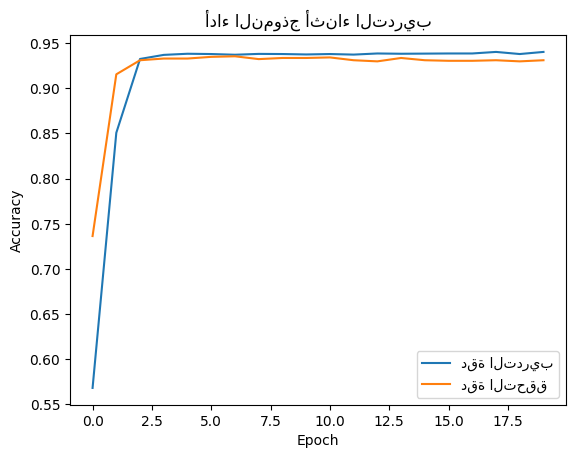

In [ ]:
# -------------------------------
# 6️⃣ رسم منحنيات التدريب
# -------------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# رسم الدقة
axes[0].plot(history.history['accuracy'], label='دقة التدريب', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='دقة التحقق', linewidth=2)
axes[0].set_title('دقة النموذج أثناء التدريب', fontsize=14)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# رسم الخسارة
axes[1].plot(history.history['loss'], label='خسارة التدريب', linewidth=2)
axes[1].plot(history.history['val_loss'], label='خسارة التحقق', linewidth=2)
axes[1].set_title('خسارة النموذج أثناء التدريب', fontsize=14)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_curves.png', dpi=150, bbox_inches='tight')
print("💾 تم حفظ الرسم في: training_curves.png")
plt.show()

In [ ]:
# -------------------------------
# 7️⃣ اختبار تحميل النموذج المحفوظ
# -------------------------------

# التحقق من إمكانية تحميل النموذج المحفوظ
loaded_model = keras.models.load_model("model_supervised.keras")

# اختبار سريع
test_input = np.array([[0.3, -0.2, 0.1]])
prediction = loaded_model.predict(test_input, verbose=0)[0][0]

print(f"✅ تم تحميل النموذج بنجاح!")
print(f"🧪 اختبار سريع - احتمالية الاضطراب: {prediction:.3f}")
print(f"\n💡 ملاحظة: يمكن الآن استخدام 'model_supervised.keras' في دفتر التعلم بالتعزيز")